# Assignment 15 – Intro to Neural Networks with NumPy

This notebook condenses `numpy_advanced_intro_to_neural_nets.md` into a structured workspace. Work through each exercise in order: first understand the idea, then implement it, and finally reflect on the takeaways.

## Workflow
1. **Research (15–30 min):** clarify the concept, its purpose, the math intuition, and look for visuals.
2. **Implementation (20–30 min):** write the code only after you know what you are doing; comment on intent and check matrix shapes.
3. **Reflection (10–15 min):** record what you learned, open questions, and any "aha" moments.

Recommended resources: 3Blue1Brown for intuition, Papers with Code for practice, and the NumPy docs for vectorization tips. Avoid blind copy/paste, iterate in small steps, and validate each change.

## Exercise I – Single ReLU Neuron
- Implement `NeuronSimplu` with random weights/bias (seeded for reproducibility).
- Add `relu(x) = max(0, x)` and use it inside `forward` to compute `ReLU(weights · inputs + bias)`.
- Print the parameters and output for a sample input, plus any helpful shape checks.
- In markdown, explain why ReLU adds non-linearity, mention pitfalls such as the dying-ReLU issue, and describe the intuition behind weights and bias.

In [1]:
import random
import numpy as np

class SimpleNeuron:
    def __init__(self, n_inputs=4, seed=42):
        random.seed(seed)

        # reproducible random params
        self.weights = np.array([random.uniform(-1, 1) for _ in range(n_inputs)])
        self.bias = random.uniform(-1, 1)

    def relu(self, x):
        return max(0, x)

    def forward(self, x):
        x = np.array(x, dtype=float)
        z = self.weights @ x + self.bias
        return self.relu(z)

# test
neuron = SimpleNeuron(n_inputs=4, seed=42)
sample_x = np.array([0.4, -0.8, 0.2, 1.3])
out = neuron.forward(sample_x)

print("weights:", neuron.weights)
print("bias:", round(neuron.bias, 4))
print("input shape:", sample_x.shape)
print("weights shape:", neuron.weights.shape)
print("output:", round(out, 6))

weights: [ 0.2788536  -0.94997849 -0.44994136 -0.55357852]
bias: 0.4729
input shape: (4,)
weights shape: (4,)
output: 0.534826


In [2]:
import random
import numpy as np

class Layer:
    def __init__(self, n_in, n_out, use_relu=True):
        random.seed(42)

        self.W = np.random.uniform(-1, 1, (n_out, n_in))
        self.b = np.random.uniform(-1, 1, (n_out,))
        self.use_relu = use_relu
        self.a = np.zeros(n_out)

    def relu(self, z):
        return np.maximum(0, z)
    
    def forward(self, x):
        z = self.W @ x + self.b
        self.a = self.relu(z) if self.use_relu else z
        return self.a

class Layers:
    def __init__(self):
        self.layers: list[Layer] = []

    def add(self, n_in, n_out, use_relu=True):
        self.layers.append(Layer(n_in, n_out, use_relu))

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

# Test

import numpy as np

def make_data(n=1000):
    X = np.random.uniform(-1, 1, (n, 2))
    y = X[:, 0] + X[:, 1]
    return X, y

def train(net, X, y, lr=0.01, epochs=200):
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            out = net.forward(xi)

            error = out - yi   # (1,)

            layer = net.layers[-1]

            # derivative of activation
            if layer.use_relu:
                dz = (layer.a > 0).astype(float) * error
            else:
                dz = error  # linear output

            # update
            layer.W -= lr * dz[:, None] * xi[None, :]
            layer.b -= lr * dz

net = Layers()
net.add(2, 1, use_relu=False)

X, y = make_data()
# print([round(float(x), 5) for x in y])
train(net, X, y)

a = random.uniform(-1, 1)
b = random.uniform(-1, 1)

test = np.array([a, b])
print("pred:", net.forward(test))
print("true:", a + b)

pred: [-0.67112489]
true: -0.6711248926388986


# Simple Network Test

In [3]:
import numpy as np

def make_data(n=1000):
    X = np.random.uniform(-1, 1, (n, 2))
    y = X[:, 0] + X[:, 1]
    return X, y

def train(net: Layers, X, y, lr=0.01, epochs=200):
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            # forward
            out = net.forward(xi)

            # compute error (simple squared loss)
            error = out - yi           # shape (1,)
            
            # gradient w.r.t z (ReLU derivative)
            dz = (net.layers[-1].a > 0).astype(float) * error

            # update weights: W -= lr * dz * x
            layer = net.layers[-1]
            layer.W -= lr * dz[:, None] * xi[None, :]
            layer.b -= lr * dz

net = Layers()
net.add(2, 1)

X, y = make_data()
# print([round(float(x), 5) for x in y])
train(net, X, y)

test = np.array([0.3, 0.4])
print("pred:", net.forward(test))
print("true:", 0.3 + 0.4)

pred: [0.7]
true: 0.7


## Exercise II – Sigmoid on Random Data
- Generate 100 random real values, apply a vectorized sigmoid, and store both the raw and transformed arrays.
- Report mean/min/max before and after sigmoid and compare the histograms to show how the function squeezes values into (0, 1).
- Document where sigmoid shines (binary classification, probability outputs), when it struggles (vanishing gradients), and how it differs from tanh or softmax.

Raw stats:
mean: -0.2077
min: -5.2395
max: 3.7046

Sigmoid stats:
mean: 0.4705
min: 0.0053
max: 0.976


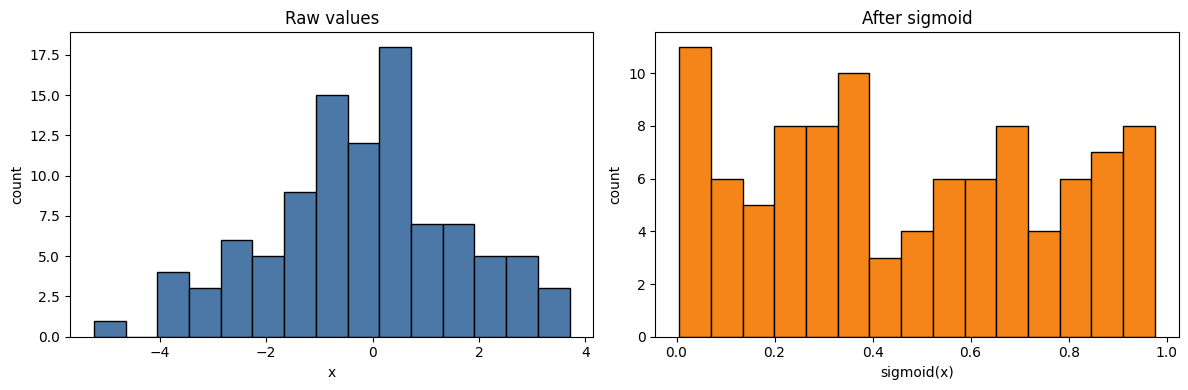

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
raw_values = np.random.normal(loc=0, scale=2.0, size=100)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid_values = sigmoid(raw_values)

print("Raw stats:")
print("mean:", round(float(raw_values.mean()), 4))
print("min:", round(float(raw_values.min()), 4))
print("max:", round(float(raw_values.max()), 4))

print("\nSigmoid stats:")
print("mean:", round(float(sigmoid_values.mean()), 4))
print("min:", round(float(sigmoid_values.min()), 4))
print("max:", round(float(sigmoid_values.max()), 4))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(raw_values, bins=15, color="#4c78a8", edgecolor="black")
axes[0].set_title("Raw values")
axes[0].set_xlabel("x")
axes[0].set_ylabel("count")

axes[1].hist(sigmoid_values, bins=15, color="#f58518", edgecolor="black")
axes[1].set_title("After sigmoid")
axes[1].set_xlabel("sigmoid(x)")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()

## Exercise III – Two-Layer Vectorized Network
- Build `ReteasNeuronala` with dense layers input→hidden→output, ReLU in the hidden layer, sigmoid in the output layer.
- Keep everything vectorized: `Z1 = X · W1 + b1`, `A1 = ReLU(Z1)`, `Z2 = A1 · W2 + b2`, `A2 = sigmoid(Z2)`, `prezice()` returns `(A2 > 0.5).astype(int)`.
- Test with synthetic data, print parameter and activation shapes, and prove the batch processing works.
- Note current limits (no training/backprop yet, hidden size is a manual choice) and how you would extend this skeleton to deeper nets.

In [5]:
import numpy as np

class ReteaNeuronala:
    def __init__(self, n_in, n_hidden, n_out, seed=42):
        np.random.seed(seed)

        self.W1 = np.random.randn(n_in, n_hidden) * 0.2
        self.b1 = np.zeros((1, n_hidden))
        self.W2 = np.random.randn(n_hidden, n_out) * 0.2
        self.b2 = np.zeros((1, n_out))

    def relu(self, z):
        return np.maximum(0, z)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        # input -> hidden
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.relu(self.Z1)

        # hidden -> output
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def prezice(self, X):
        A2 = self.forward(X)
        return (A2 > 0.5).astype(int)

# synthetic batch data
np.random.seed(42)
X = np.random.randn(8, 3)

model = ReteaNeuronala(n_in=3, n_hidden=5, n_out=1, seed=42)
probs = model.forward(X)
preds = model.prezice(X)

print("W1 shape:", model.W1.shape)
print("b1 shape:", model.b1.shape)
print("W2 shape:", model.W2.shape)
print("b2 shape:", model.b2.shape)
print("X shape:", X.shape)
print("Z1 shape:", model.Z1.shape)
print("A1 shape:", model.A1.shape)
print("Z2 shape:", model.Z2.shape)
print("A2 shape:", probs.shape)
print("predictions shape:", preds.shape)
print("\nprobs first 5:", probs[:5].ravel())
print("preds first 5:", preds[:5].ravel())

W1 shape: (3, 5)
b1 shape: (1, 5)
W2 shape: (5, 1)
b2 shape: (1, 1)
X shape: (8, 3)
Z1 shape: (8, 5)
A1 shape: (8, 5)
Z2 shape: (8, 1)
A2 shape: (8, 1)
predictions shape: (8, 1)

probs first 5: [0.50117001 0.47108876 0.44916327 0.47311647 0.42485472]
preds first 5: [1 0 0 0 0]


## Evaluation & Good Practices
- **Correctness (40%)** – math functions and matrix ops behave as intended.
- **Vectorization (30%)** – NumPy handles the heavy lifting; no unnecessary loops.
- **Clarity (20%)** – meaningful names plus comments that explain intent.
- **Testing (10%)** – run sample inputs, print shapes/results, and check reproducibility.

Always log new questions, seed randomness when needed, and use shape prints to debug quickly.